Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


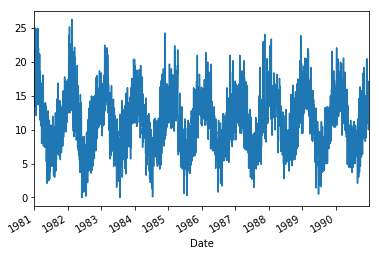

In [1]:
from pandas import Series
from matplotlib import pyplot

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
# "Date","Temp"
# "1981-01-01",20.7
# "1981-01-02",17.9
# "1981-01-03",18.8
# "1981-01-04",14.6
# "1981-01-05",15.8
# ...

print(series.head())
series.plot()
pyplot.show()

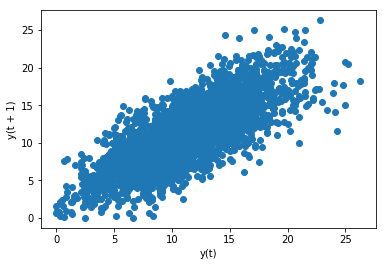

In [2]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
lag_plot(series)
pyplot.show()

In [3]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
values = DataFrame(series.values) #make key:value structure to 2-dimensional labeled data structure 
# print(values)
#          0
# 0     20.7
# 1     17.9
# 2     18.8
# 3     14.6
# 4     15.8
# 5     15.8
# ...

p = 1 #lag order
dataframe = concat([values.shift(p), values], axis=1) #create lag p column (t-p)
# print(dataframe)
#          0     0
# 0      NaN  20.7
# 1     20.7  17.9
# 2     17.9  18.8
# 3     18.8  14.6
# 4     14.6  15.8
# 5     15.8  15.8
# ...

dataframe.columns = ['t-'+str(p), 't+'+str(p)] #label column name
# print(dataframe)
#        t-1   t+1
# 0      NaN  20.7
# 1     20.7  17.9
# 2     17.9  18.8
# 3     18.8  14.6
# 4     14.6  15.8
# 5     15.8  15.8
# ...

result = dataframe.corr() #calculate correlation matrix 
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


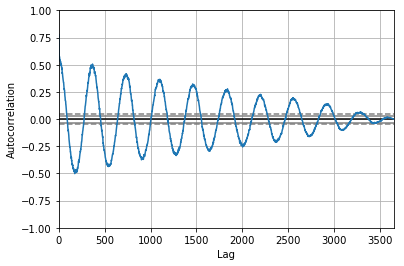

In [4]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
autocorrelation_plot(series)
pyplot.show()

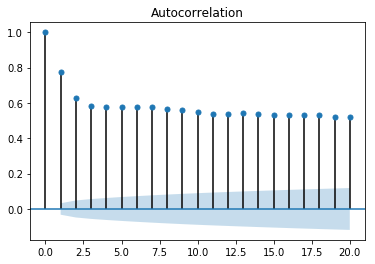

In [6]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
plot_acf(series, lags=20) # vary lags for zoom-in or zoom-out
pyplot.show()

Test MSE: 3.423


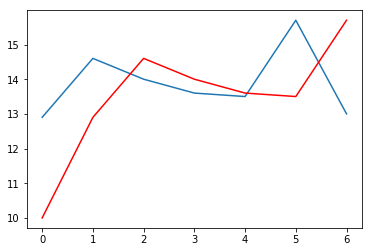

In [7]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# import data
series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)

# create lagged dataset
p = 1 #lag order
values    = DataFrame(series.values) #make key:value structure to 2-dimensional labeled data structure 
dataframe = concat([values.shift(p), values], axis=1) #create lag p column (t-p)
dataframe.columns = ['t-'+str(p), 't+'+str(p)] #label column name

# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1] #y lags p order from x
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

# test_score = mean_squared_error(test_y, predictions)
test_score = mean_squared_error(test_y, test_X)

print('Test MSE: %.3f' % test_score)
# plot predictions vs expected (real value)
pyplot.plot(test_y) # real value
pyplot.plot(predictions, color='red') # prediction value
pyplot.show() 

Lag: 29
Coefficients: [  5.57543506e-01   5.88595221e-01  -9.08257090e-02   4.82615092e-02
   4.00650265e-02   3.93020055e-02   2.59463738e-02   4.46675960e-02
   1.27681498e-02   3.74362239e-02  -8.11700276e-04   4.79081949e-03
   1.84731397e-02   2.68908418e-02   5.75906178e-04   2.48096415e-02
   7.40316579e-03   9.91622149e-03   3.41599123e-02  -9.11961877e-03
   2.42127561e-02   1.87870751e-02   1.21841870e-02  -1.85534575e-02
  -1.77162867e-03   1.67319894e-02   1.97615668e-02   9.83245087e-03
   6.22710723e-03  -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test MSE: 1.502


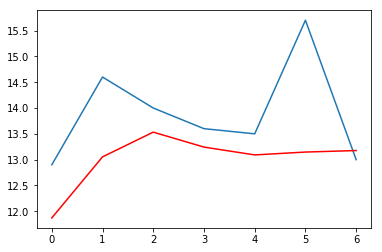

In [8]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

## ====== train autoregression ======== ##
model = AR(train)
model_fit = model.fit()
print('Lag:',model_fit.k_ar)
print('Coefficients:',model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test MSE: 1.451


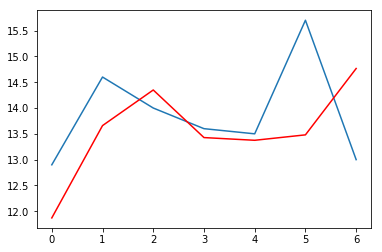

In [9]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar # order = 29
coef = model_fit.params # [b0 b1 ... bn]

# walk forward over time steps in test
history = train[len(train)-window:] # row ที่ len(train)-window ถึง end 
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history) # 29
    lag = [history[i] for i in range(length-window,length)] # 1-29
    
    # create yhat
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()